In [3]:
import pandas as pd
import ydata_profiling

from ydata_profiling import ProfileReport

df = pd.read_csv("datasets/VideoGamesSalesCleaned.csv",index_col=False)
# profile = ProfileReport(df, title="Profiling Report")
# profile


FileNotFoundError: [Errno 2] No such file or directory: 'datasets/VideoGamesSalesCleaned.csv'

# Data Pre Processing Cleaning


In [2]:
# Train test split the data for target variable Global_Sales

from sklearn.model_selection import train_test_split

# Categorical label encode columns platform, rating, publisher

from sklearn.preprocessing import LabelEncoder

# self.label = LabelEncoder()

# df['Platform'] = self.label.fit_transform(df['Platform'])
# df['Rating'] = self.label.fit_transform(df['Rating'])
# df['Publisher'] = le.fit_transform(df['Publisher'])


# One hot encoded columns Genre

# df = pd.get_dummies(df, columns=['Genre'])
df.reset_index(inplace=True,drop=True)

df.head()

df = df.drop(columns=['Name', 'index'])

# Split dataset into train and test dataframes without extracting the target variable

train, test = train_test_split(df, test_size=0.25, random_state=42)

train.head()




NameError: name 'df' is not defined

# EDA


Index(['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'User_Score',
       'User_Count', 'Rating'],
      dtype='object')


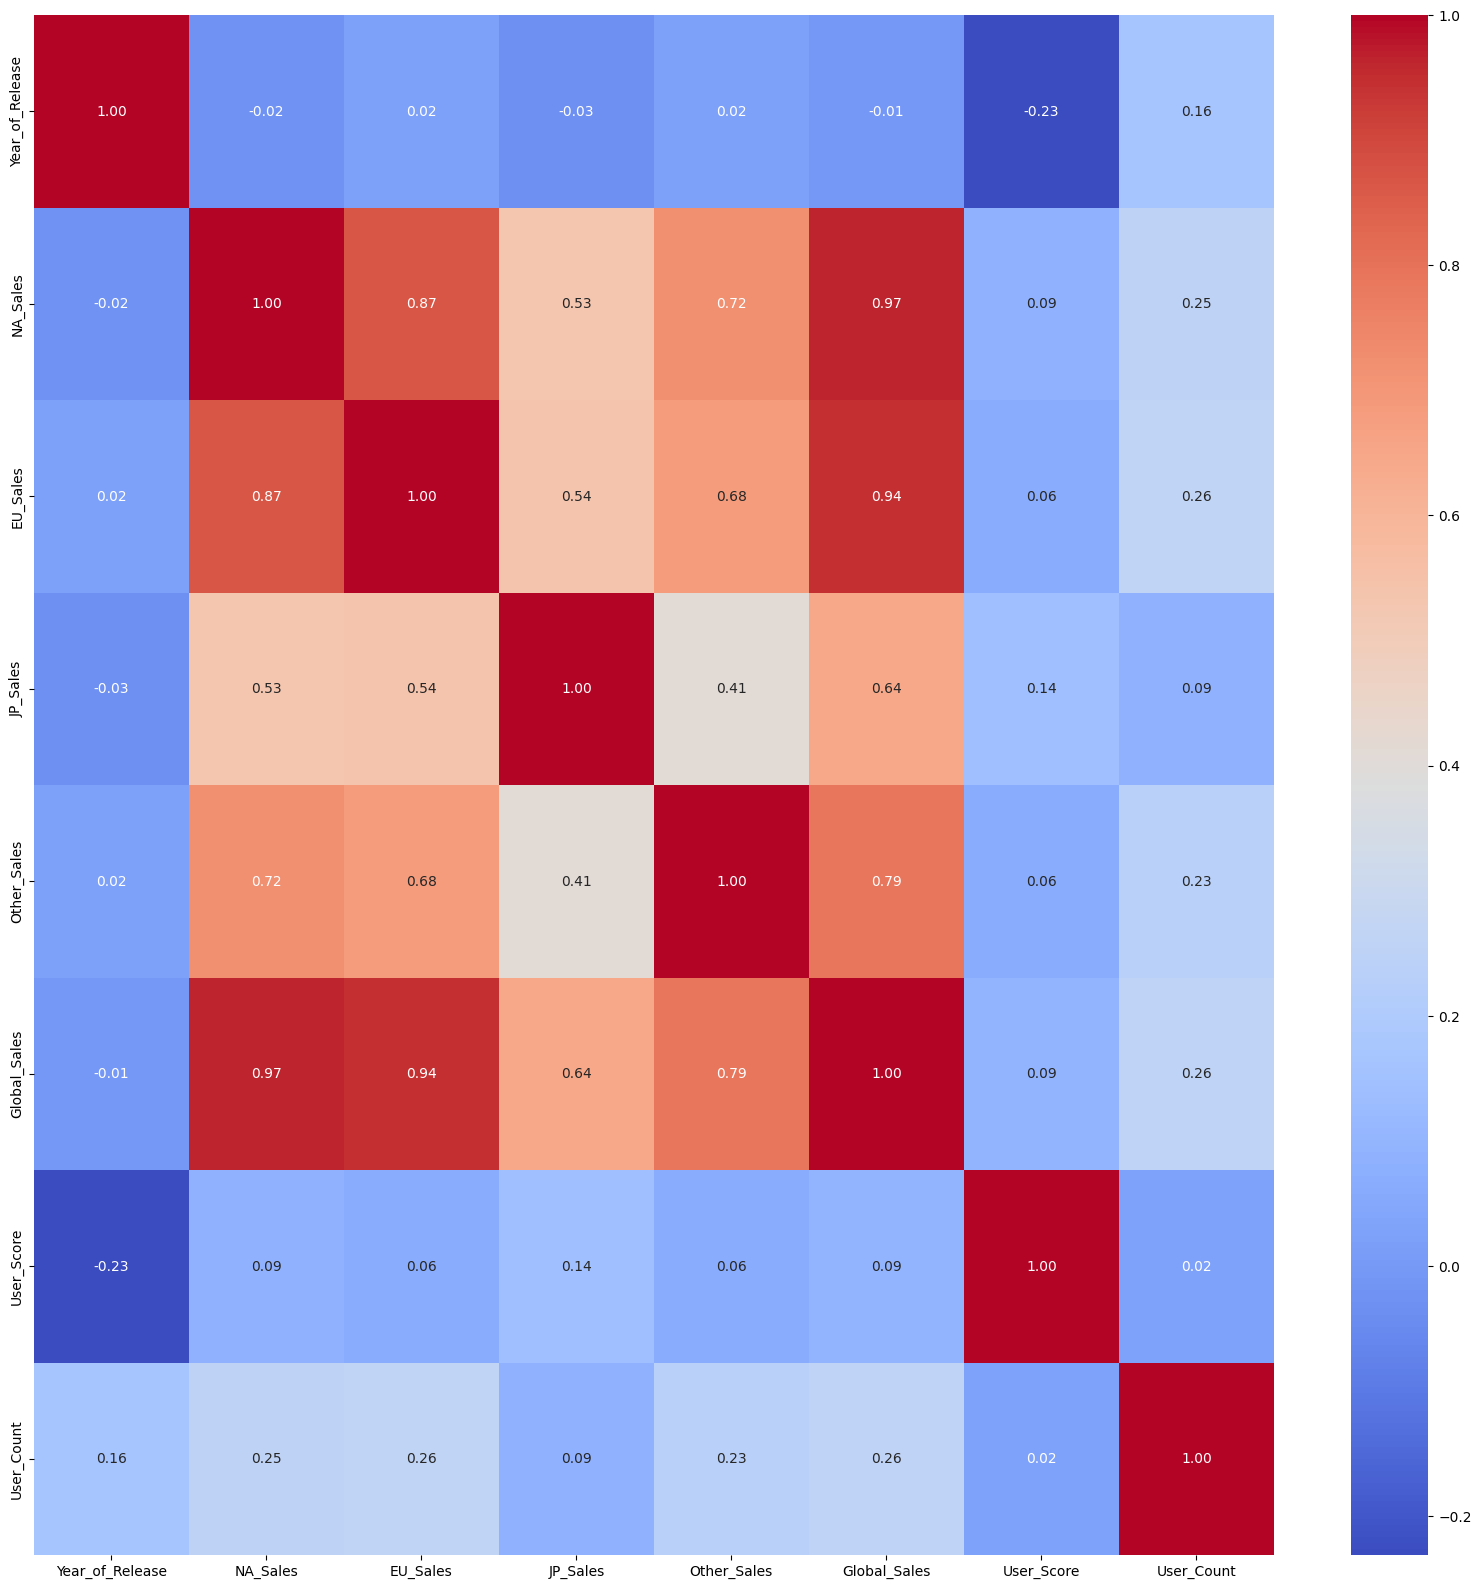

In [3]:
# import seaborn as sns
# Utilize Seaborn to plot the feature correlation heatmap with correlation values displayed.


import seaborn as sns
import matplotlib.pyplot as plt
print(train.columns)
plt.figure(figsize=(20,20))
numerical_columns = ['Year_of_Release', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'User_Score',
       'User_Count']
sns.heatmap(train[ numerical_columns ].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Utilize Seaborn to plot the feature correlation heatmap with correlation values displayed.


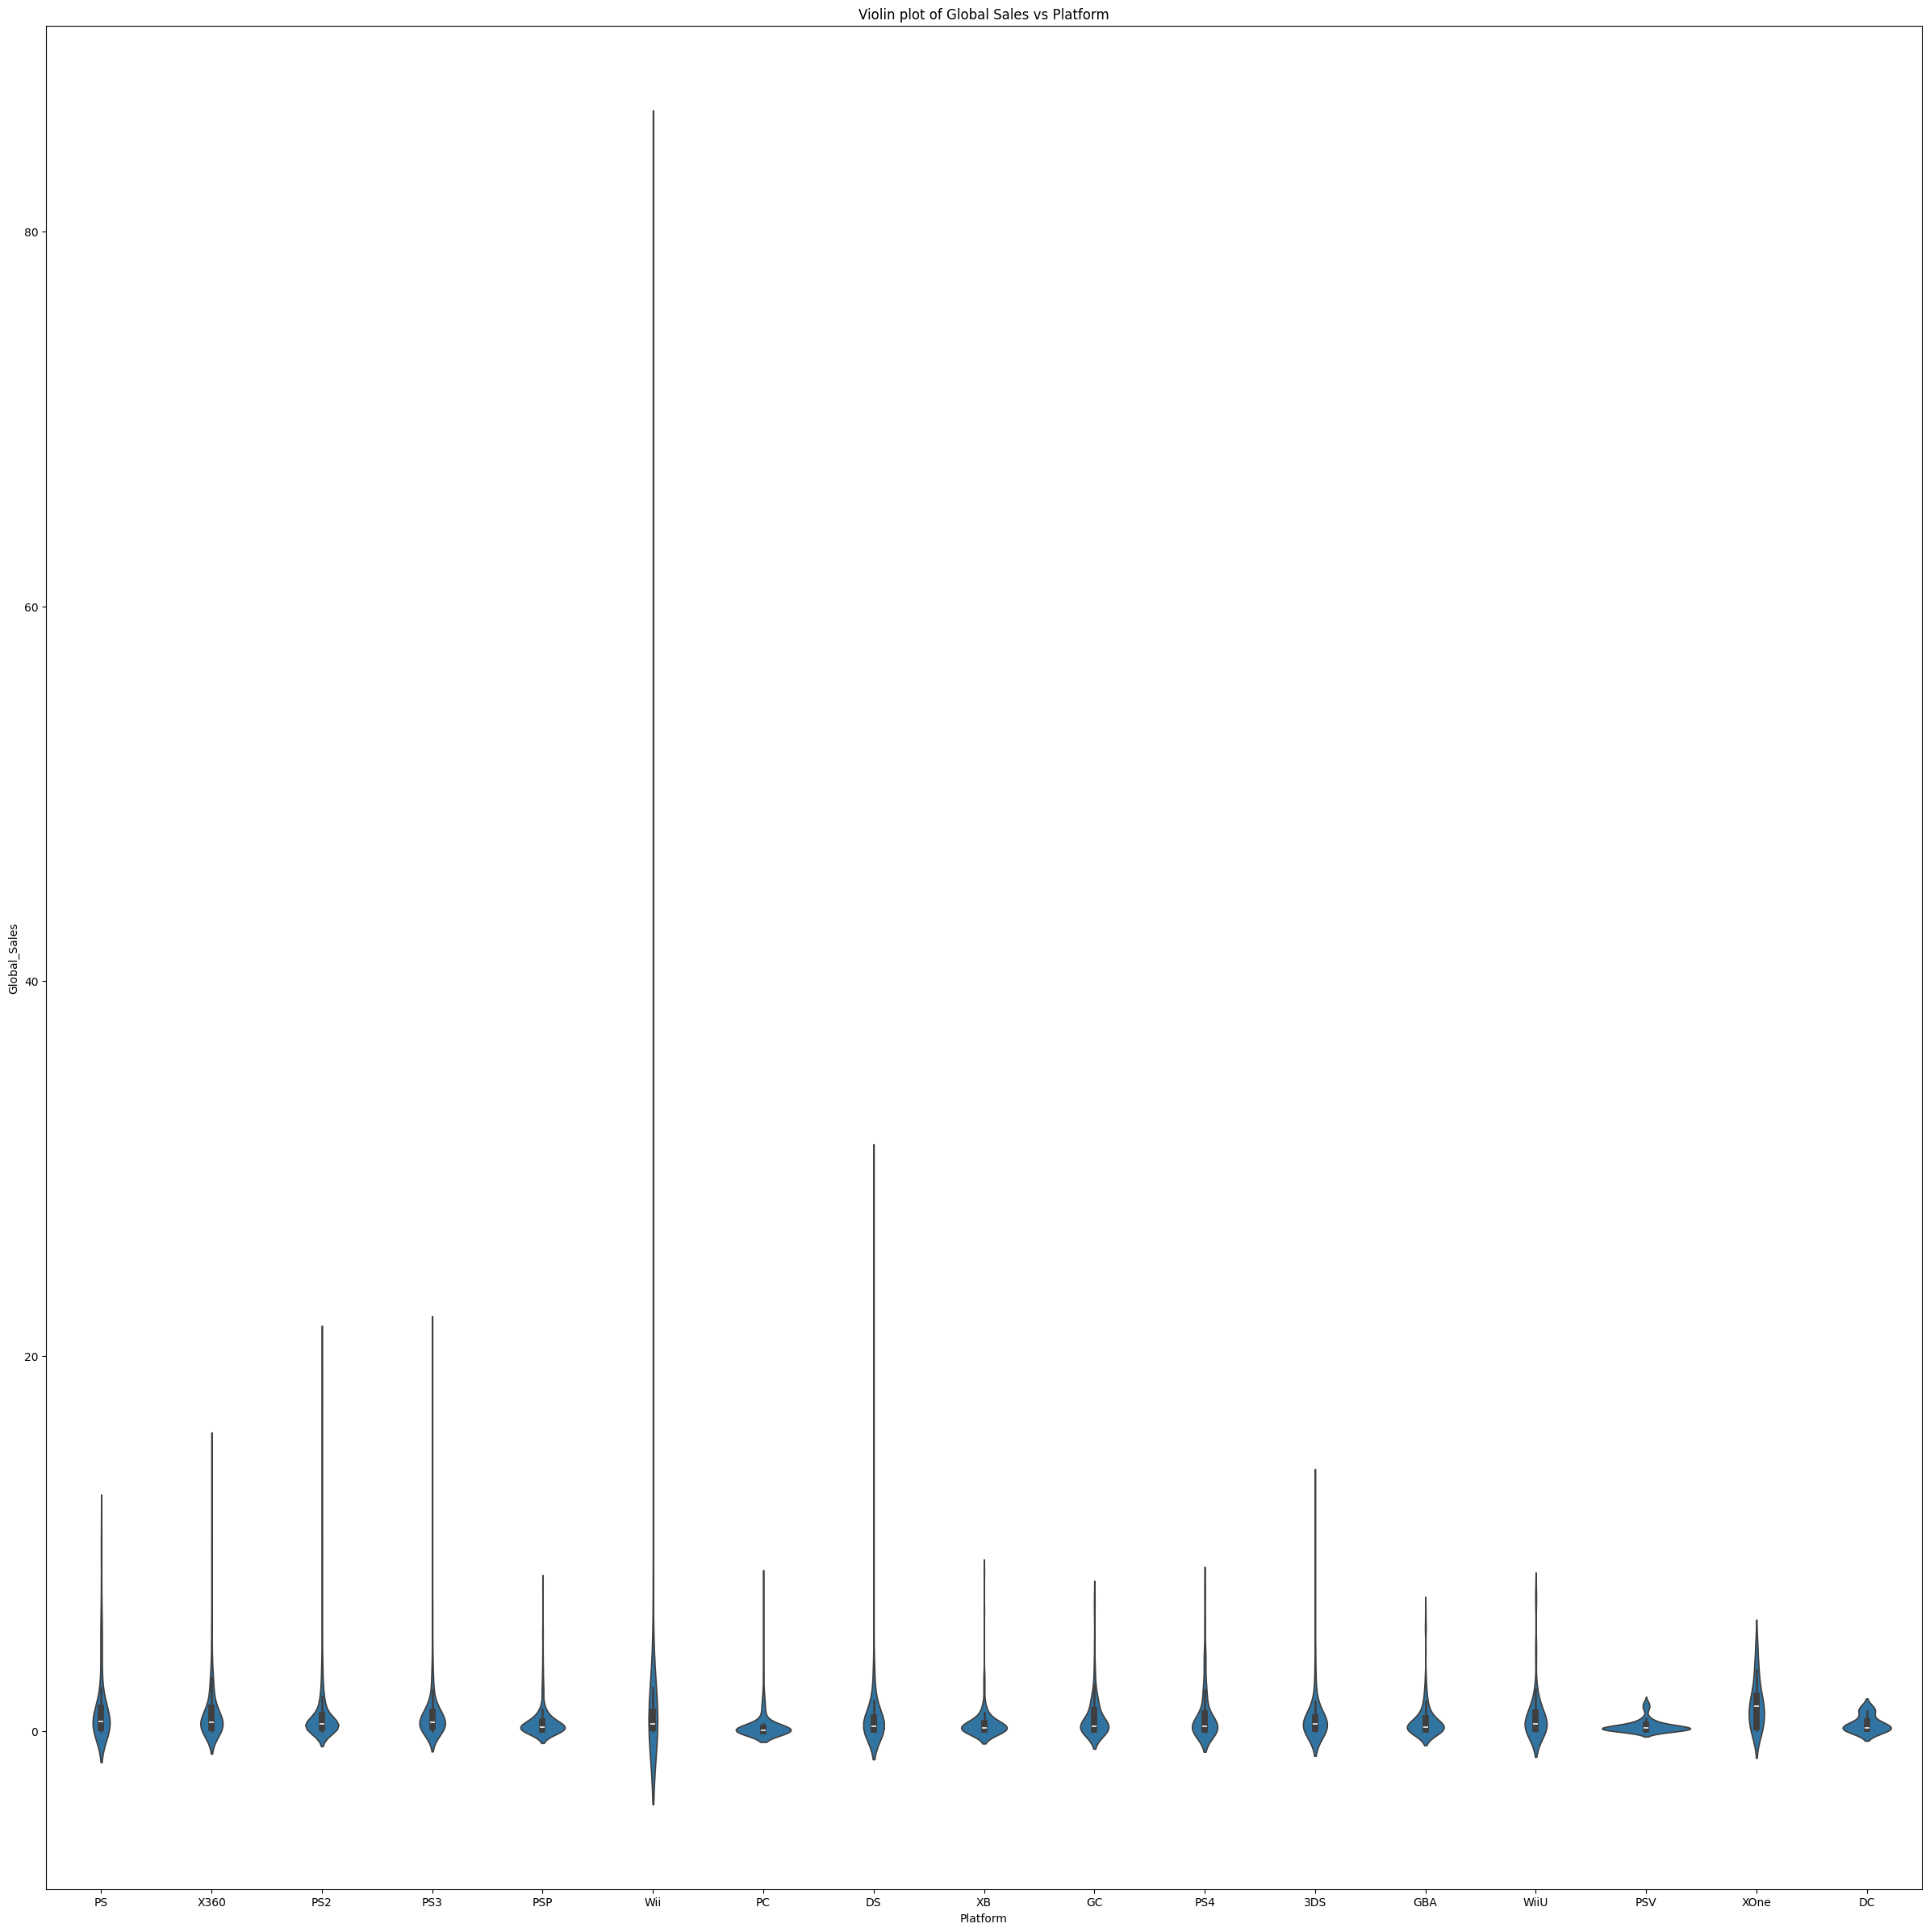

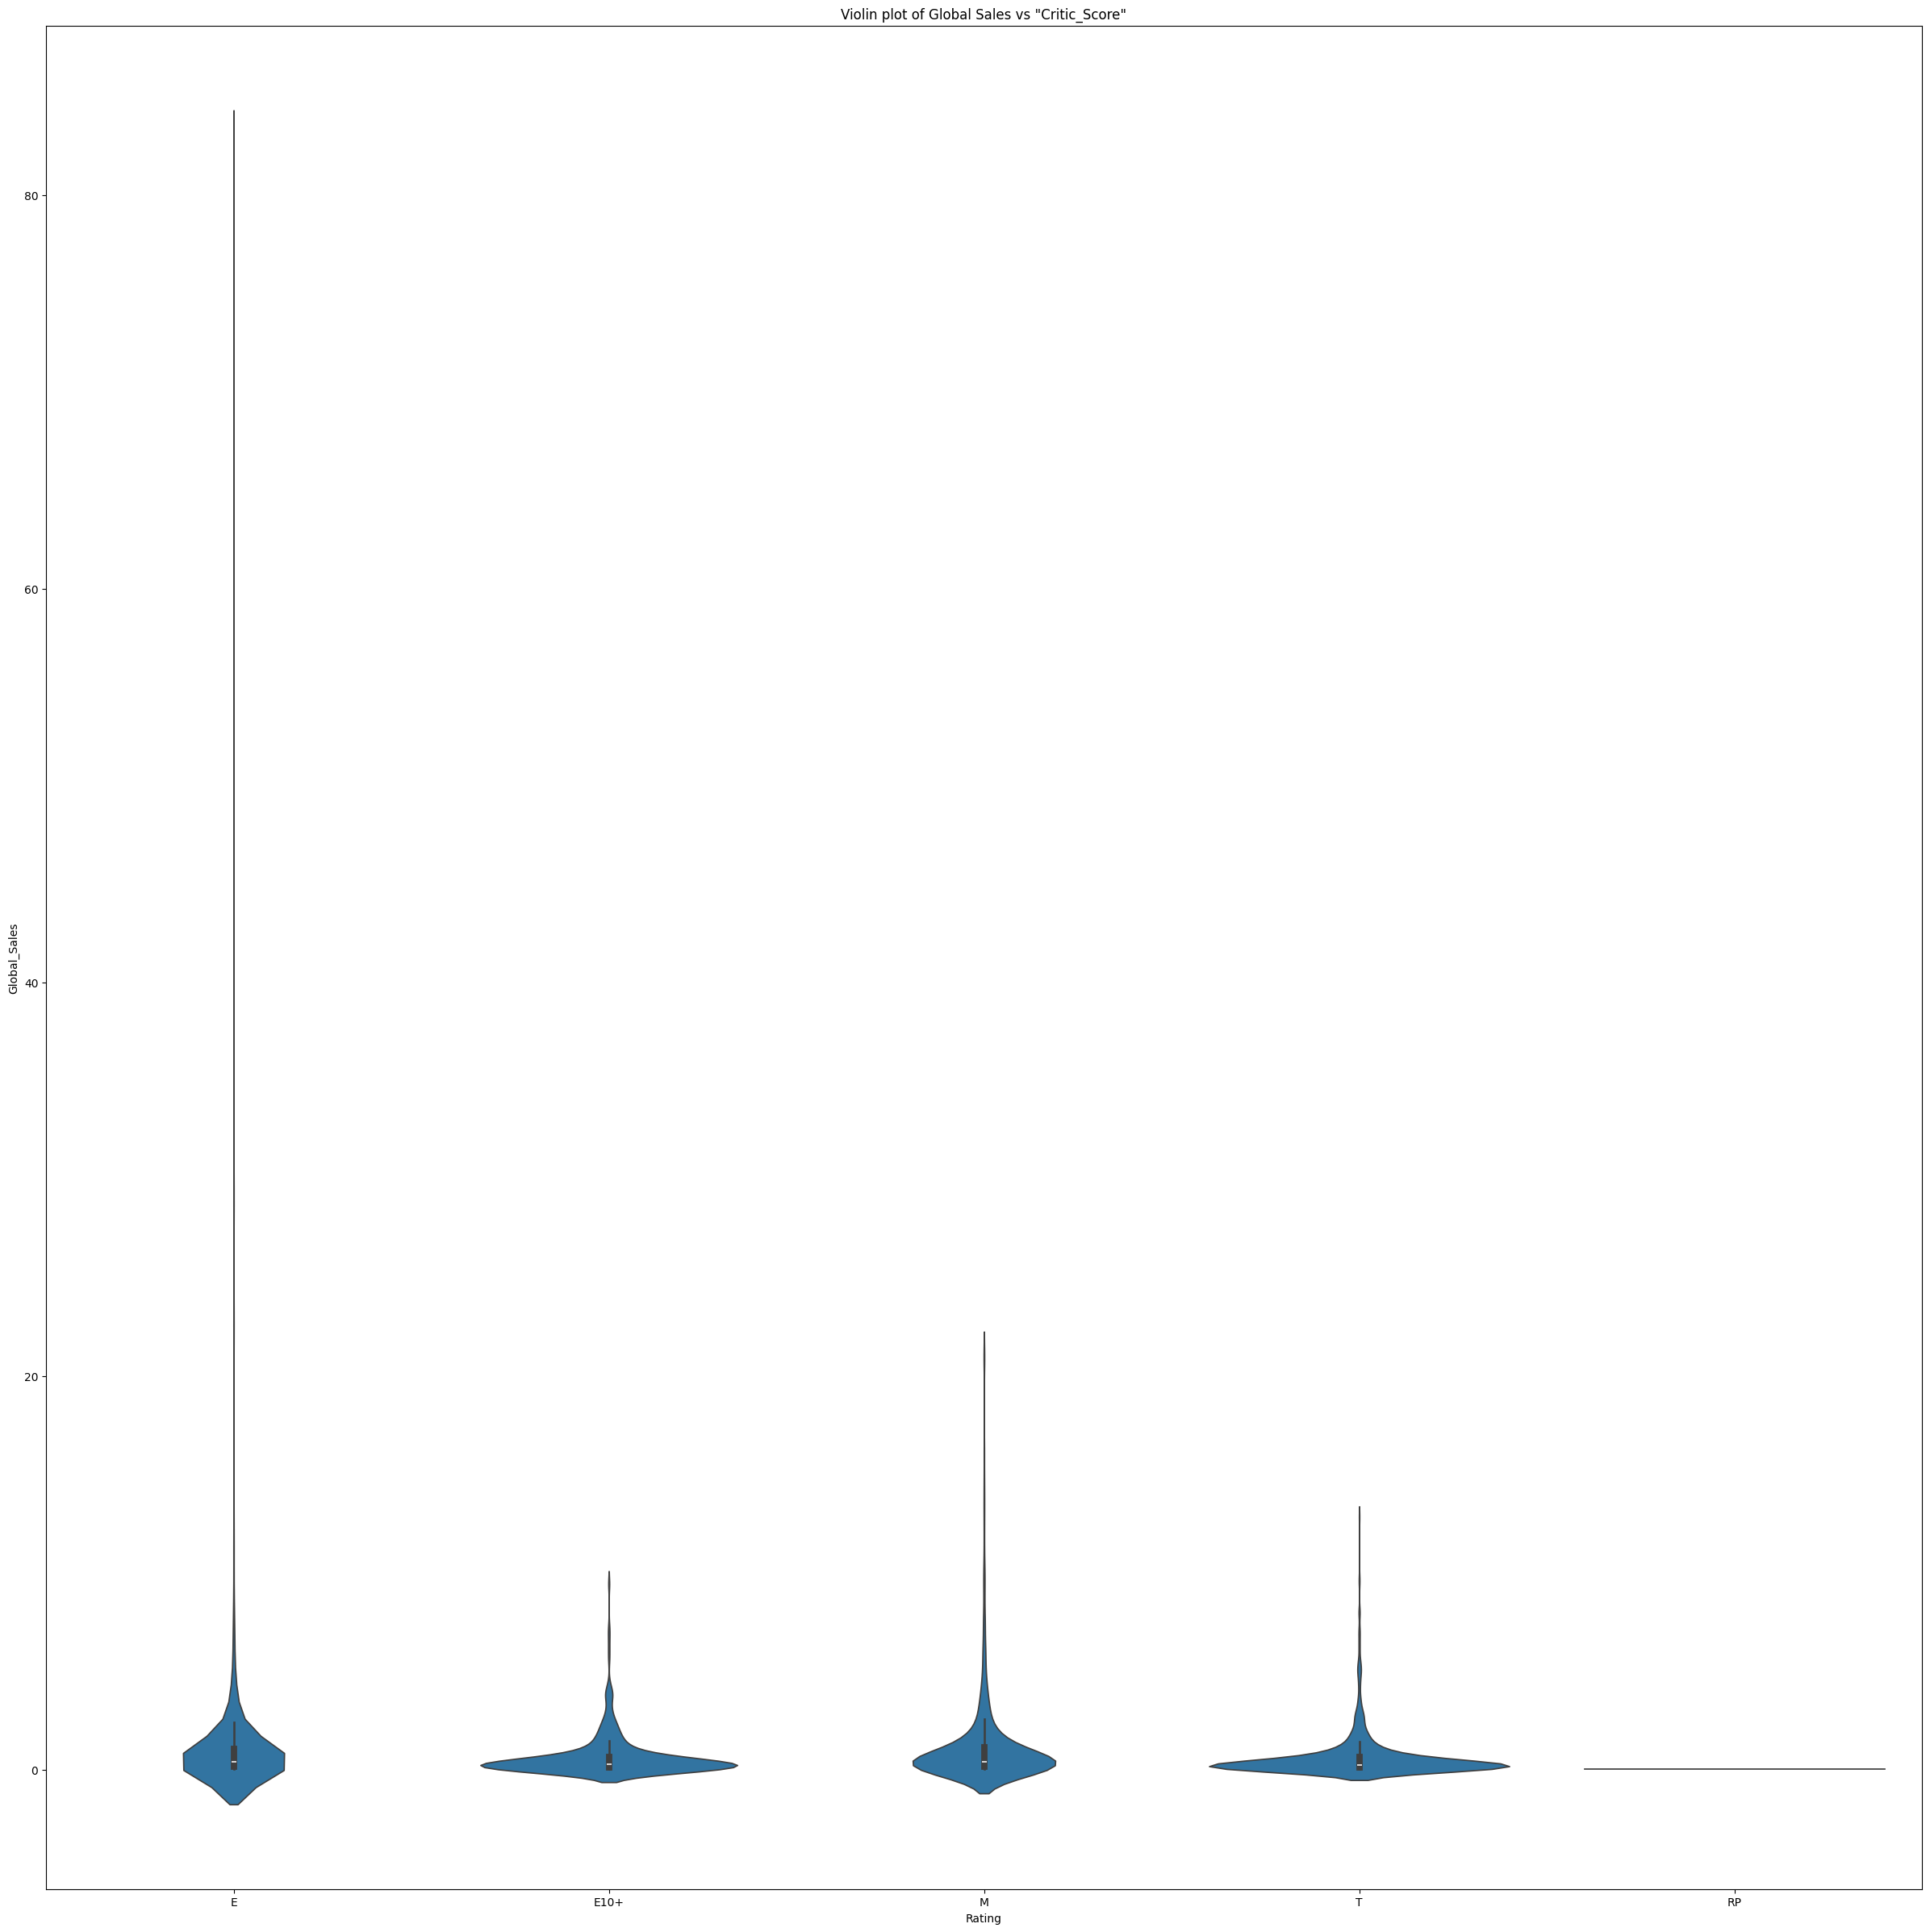

In [4]:
# Display violin plots to demonstrate the correlation between the target value and categorical features.

plt.figure(figsize=(30,30))
plt.title('Violin plot of Global Sales vs Platform')
sns.violinplot(x='Platform', y='Global_Sales', data=train)
plt.show()


plt.figure(figsize=(30,30))
plt.title('Violin plot of Global Sales vs "Rating"')
sns.violinplot(x='Rating', y='Global_Sales', data=train)
plt.show()


# Insights Go here.


In [5]:
# Develop a class-based preprocessor (4pts):
# Address null and missing values and explain the strategy for handling them.
# Manage non-normal distributions and detail the strategy for addressing them if necessary.
# Implement one-hot encoding for categorical values if required.
# Scale the data.



from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder



class Preprocessor(BaseEstimator, TransformerMixin):

    numerical_columns = ['Year_of_Release', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'User_Score',
       'User_Count']

    categorical_columns = [
        'Platform', 
        'Publisher'
    ]

    one_hot_columns = [ "Genre", "Rating", ]
    

    def __init__(self):
        self.imputer = SimpleImputer(strategy='mean')
        self.scaler = StandardScaler()
        self.onehot = OneHotEncoder(handle_unknown='ignore')
        self.label = LabelEncoder()

    def fit(self, X, y=None):

        self.imputer.fit(X[self.numerical_columns])
        self.scaler.fit(X[self.numerical_columns])
        self.onehot.fit(X[self.one_hot_columns])
        return self

    def compute_days_since_release(self,year):
        return 2024 - year

    def transform(self, X, y=None):
        imputed_cols = self.imputer.transform(X[self.numerical_columns])
        onehot_cols = self.onehot.transform(X[self.one_hot_columns])
        
        # Copy the df 
        transformed_df = X.copy()
         
        # Apply transformed columns
        transformed_df[self.numerical_columns] = imputed_cols
        transformed_df[self.numerical_columns] = self.scaler.transform(transformed_df[self.numerical_columns]) 

        transformed_df['Platform'] = self.label.fit_transform(X['Platform'])
        transformed_df['Rating'] = self.label.fit_transform(X['Rating'])
        transformed_df['Publisher'] = self.label.fit_transform(X['Publisher'])        
        
        # Drop existing categorical columns and replace with one hot equivalent
        transformed_df = transformed_df.drop(self.one_hot_columns, axis=1) 
        transformed_df[self.onehot.get_feature_names_out()] = onehot_cols.toarray().astype(int)

        # Feature Engnieer Days Since release
        transformed_df['Days_Since_Release'] = transformed_df['Year_of_Release'].apply(self.compute_days_since_release)

        return transformed_df

# Implement the preprocessor on the training data and display the first five rows of the transformed data.

preprocessor = Preprocessor()
preprocessor.fit(train)
train_fixed = preprocessor.transform(train)
train_fixed.head()



,Platform,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,User_Count,...,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_M,Rating_RP,Rating_T,Rating_nan,Days_Since_Release
817,6,-1.630834,62,0.224402,0.243458,-0.267122,-0.045838,1.25,0.477787,-0.260606,...,0,1,0,1,0,0,0,0,0,2025.630834
3062,14,1.160056,82,-0.234928,-0.317473,-0.267122,-0.248978,0.17,-1.420572,-0.262345,...,0,0,0,0,1,0,0,0,0,2022.839944
208,7,-1.165686,189,1.781023,0.649237,-0.087761,0.418480,3.65,0.409989,-0.128479,...,0,0,0,0,0,1,0,0,0,2025.165686
293,7,-0.933111,189,1.517333,0.291196,-0.087761,0.157301,2.94,1.155773,-0.109355,...,0,0,0,0,0,1,0,0,0,2024.933111
1119,8,0.927481,208,-0.158373,-0.162322,1.107978,-0.103878,0.91,0.070996,-0.171942,...,0,0,0,0,0,0,0,1,0,2023.072519


In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
rfr = make_pipeline(Preprocessor(), RandomForestRegressor(n_estimators=50))
X_train = train.drop(columns=['Global_Sales'])
y_train = train['Global_Sales']
rfr.fit(X_train, y_train)
params = rfr.get_params()

rfr

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=50))])

In [7]:
# train test split the data train for the target variable Global_Sales



{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('randomforestregressor', RandomForestRegressor(n_estimators=50))],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'randomforestregressor': RandomForestRegressor(n_estimators=50),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__monotonic_cst': None,
 'randomforestregressor__n_estimators': 50,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': None,
 'r

In [8]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
y_train_hat=rfr.predict(X_train)
root_mean_squared_error(y_train, y_train_hat)
mean_absolute_error(y_train, y_train_hat)

0.028837215909090927

In [9]:
y_test = test['Global_Sales']
X_test = test.drop('Global_Sales', axis=1)

In [10]:
y_test_hat=rfr.predict(X_test)
rm2e = root_mean_squared_error(y_test, y_test_hat)
mae = mean_absolute_error(y_test, y_test_hat)
print(mae, rm2e)

0.054903577512776844 0.2626958617396318


In [11]:
import json
sample_input = (json.dumps(X_test.iloc[25].to_dict(), indent=2))

from dill import dump, load

with open('models/rfr_model.pkl', 'wb') as f:
    dump(rfr, f)

with open('sample_input.json', 'w') as f:
    f.write(sample_input)



In [1]:
import mlflow
import os
from mlflow.models import infer_signature

# Set our tracking server uri for logging
# mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

mlflow_exp_name = 'Video_Games_Sales_Model'
# os.environ['MLFLOW_TRACKING_URI'] = 'http://127.0.0.1:8080'

# Create a new MLflow Experiment
mlflow.set_experiment(mlflow_exp_name)

os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/Zorrat/EAS-503-Group7-ML-Project.mlflow'
os.environ["MLFLOW_TRACKING_USERNAME"] = "Zorrat"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "df70bc1aa2b8de0b1f0ce7fc8c6644604a677f92"
# MLFLOW_TRACKING_URI=https://dagshub.com/Zorrat/EAS-503-Group7-ML-Project.mlflow \
# MLFLOW_TRACKING_USERNAME=Zorrat \
# MLFLOW_TRACKING_PASSWORD=df70bc1aa2b8de0b1f0ce7fc8c6644604a677f92 \
# python script.py

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric("root_mean_squared_error", rm2e)
    mlflow.log_metric("mean_absolute_error", mae)
    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "RandomForestRegressor model for housing data, n_estimators=50")
    remote_server_uri="https://dagshub.com/Zorrat/EAS-503-Group7-ML-Project.mlflow"
    mlflow.set_tracking_uri(remote_server_uri)

    # Infer the model signature
    signature = infer_signature(X_train, rfr.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=rfr,
        artifact_path="Video_Games_Sales_Model",
        signature=signature,
        input_example=preprocessor.transform(X_train),
        registered_model_name="rfr_moodel_n_estimators=50",
    )
    

2024/05/16 04:03:08 INFO mlflow.tracking.fluent: Experiment with name 'Video_Games_Sales_Model' does not exist. Creating a new experiment.


MlflowException: API request to https://dagshub.com/Zorrat/EAS-503-Group7-ML-Project.mlflow/api/2.0/mlflow/runs/create failed with exception HTTPSConnectionPool(host='dagshub.com', port=443): Max retries exceeded with url: /Zorrat/EAS-503-Group7-ML-Project.mlflow/api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))

In [2]:
from lazypredict import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

ImportError: cannot import name 'LazyRegressor' from 'lazypredict' (/Users/rohan/UB/sem1/python/EAS-503-Group7-ML-Project/mleVenv/lib/python3.11/site-packages/lazypredict/__init__.py)